Podgląd danych:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptio

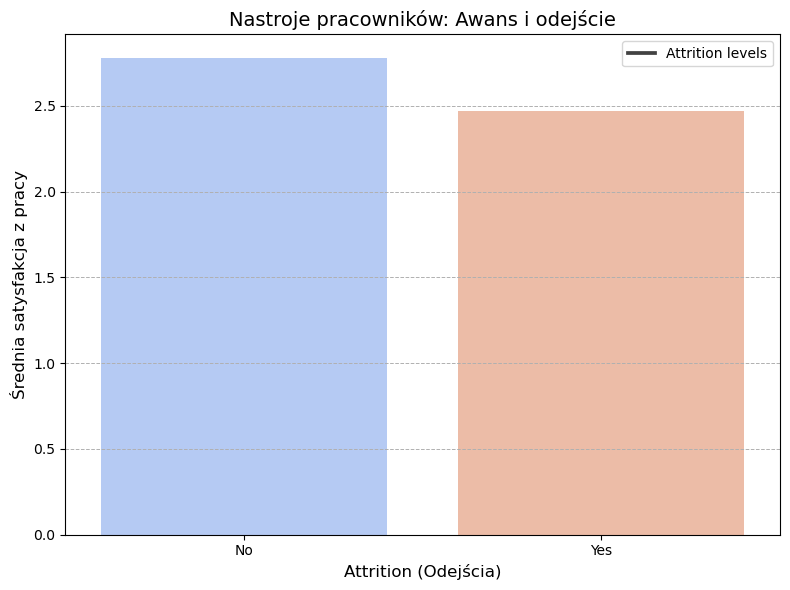

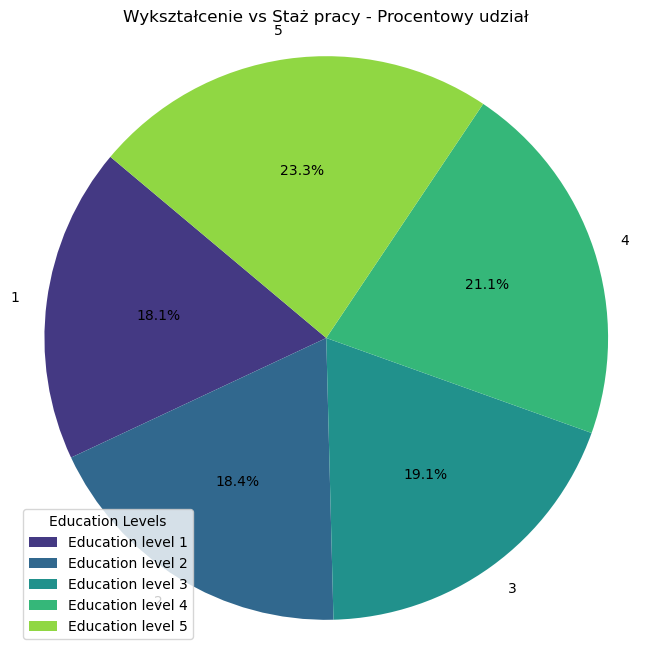

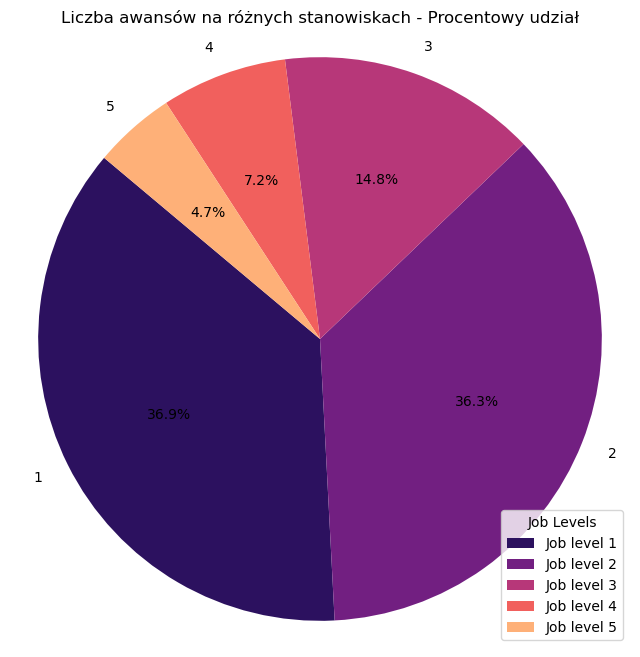

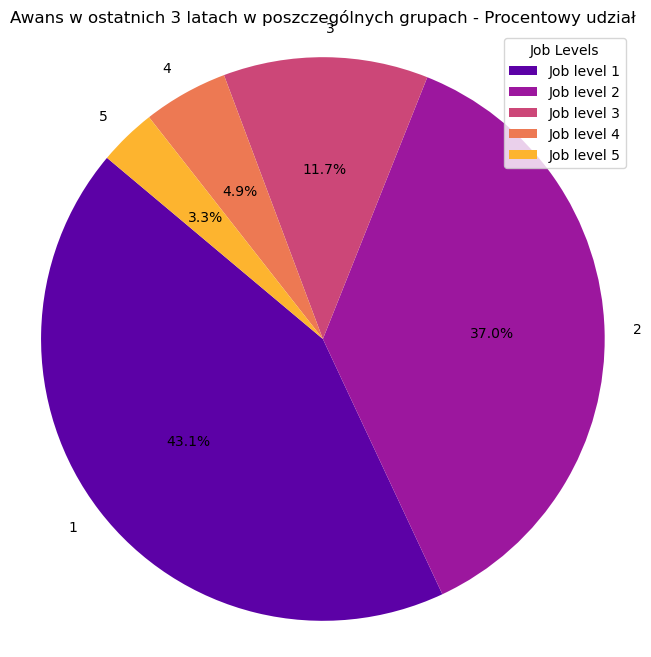

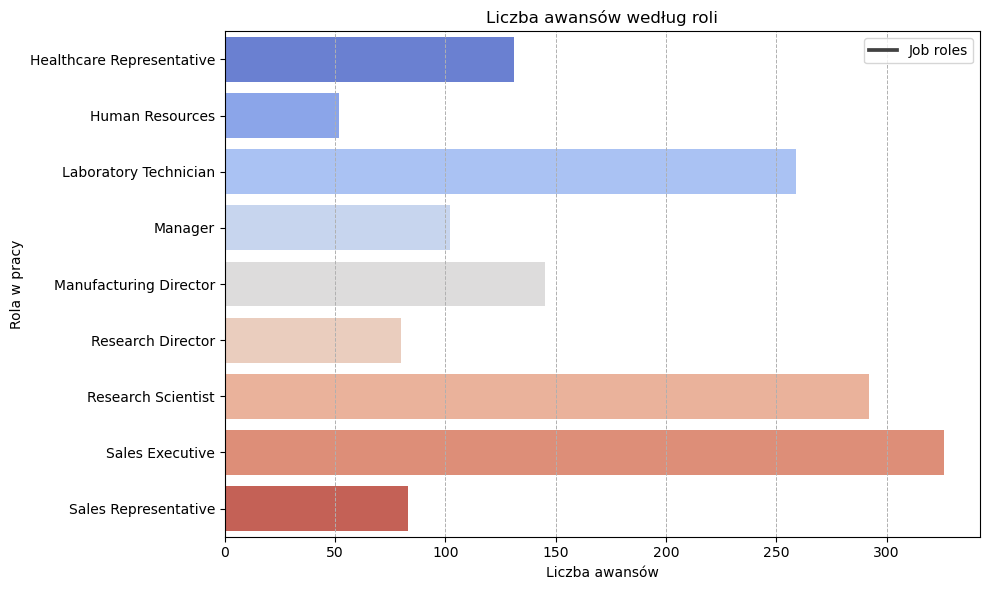

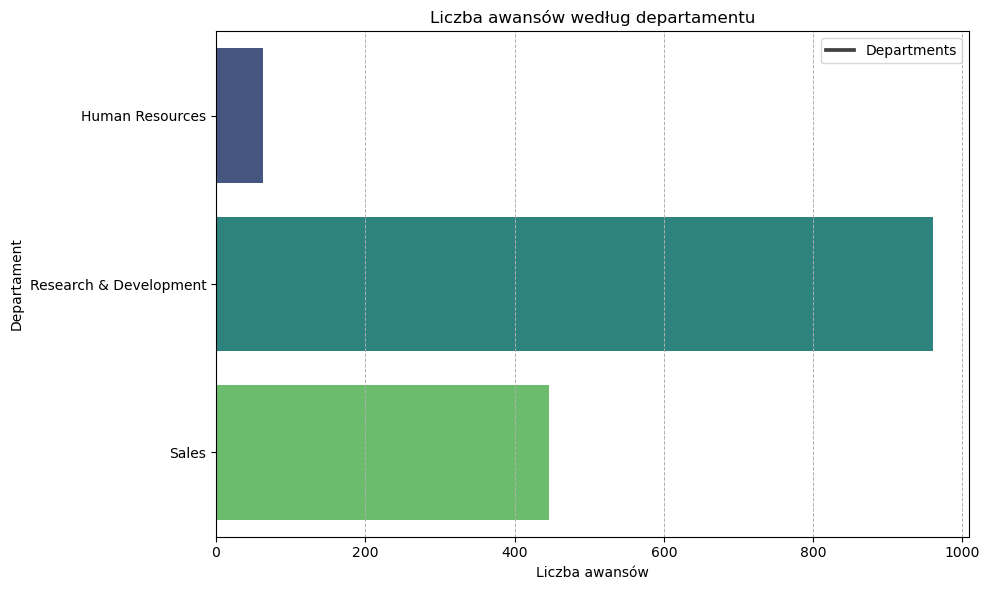

Brak kolumny 'Year' do analizy liczby awansów na przestrzeni lat.


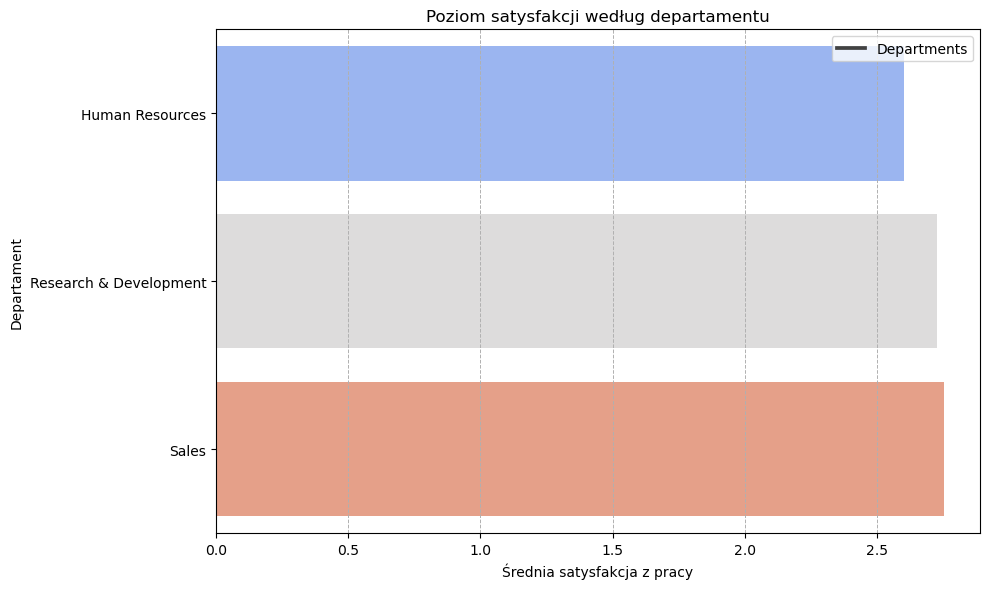

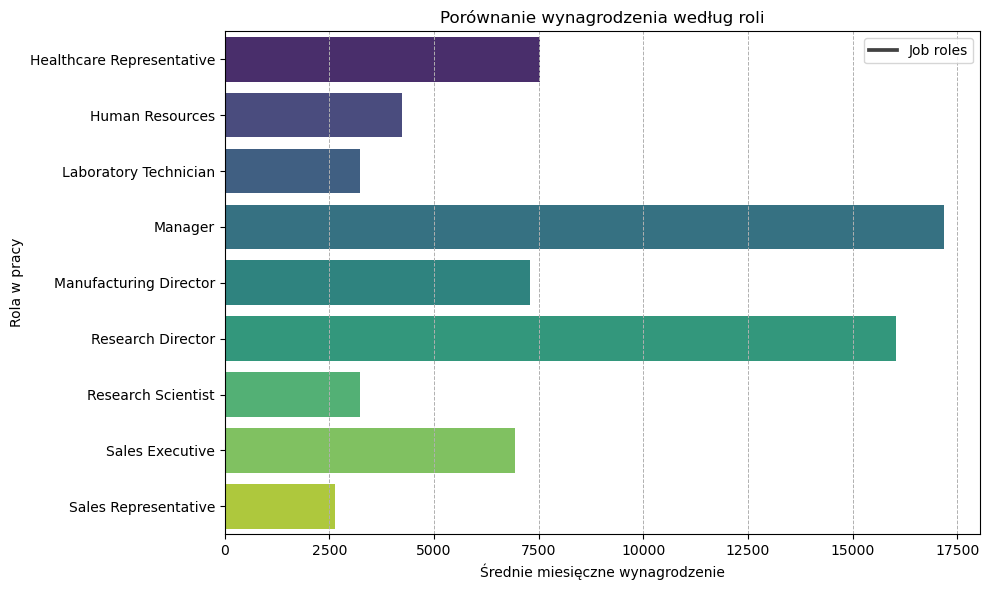

Brak odpowiednich kolumn do analizy satysfakcji z pracy na przestrzeni lat.


C:\Users\macie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


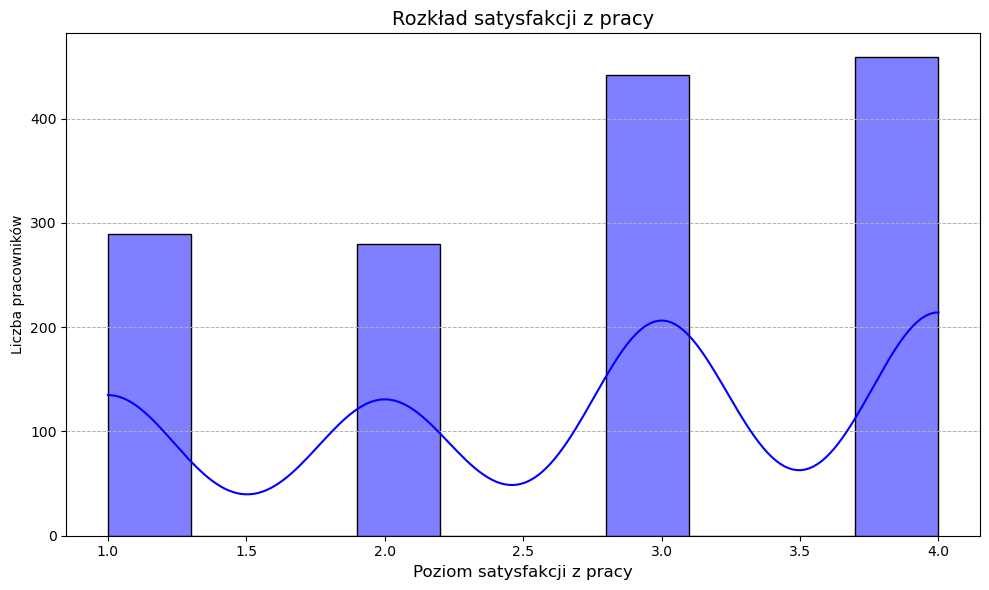

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
data_path = r"C:\Users\macie\Desktop\ISA\miniprojekt-2\dane\HR_Analytics.csv"  # Upewnij się, że ścieżka do pliku jest poprawna
data = pd.read_csv(data_path)

# Podstawowa eksploracja
print("Podgląd danych:")
print(data.head())

# Analiza nastrojów wśród pracowników w kontekście awansu lub odejścia
attrition_satisfaction = data.groupby('Attrition')['JobSatisfaction'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_satisfaction.index, y=attrition_satisfaction.values, palette='coolwarm')
plt.title('Nastroje pracowników: Awans i odejście', fontsize=14)
plt.xlabel('Attrition (Odejścia)', fontsize=12)
plt.ylabel('Średnia satysfakcja z pracy', fontsize=12)
plt.legend(['Attrition levels'])
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Porównanie wykształcenia względem stażu pracy
education_vs_tenure = data.groupby('Education')['YearsAtCompany'].mean()
plt.figure(figsize=(8, 8))
plt.pie(education_vs_tenure.values, labels=education_vs_tenure.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(education_vs_tenure)))
plt.title('Wykształcenie vs Staż pracy - Procentowy udział')
plt.legend([f'Education level {i}' for i in education_vs_tenure.index], title="Education Levels")
plt.axis('equal')
plt.show()

# Liczba awansów na poszczególnych stanowiskach w ostatnich latach
promotions_by_joblevel = data.groupby('JobLevel')['YearsSinceLastPromotion'].count()
plt.figure(figsize=(8, 8))
plt.pie(promotions_by_joblevel.values, labels=promotions_by_joblevel.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma', len(promotions_by_joblevel)))
plt.title('Liczba awansów na różnych stanowiskach - Procentowy udział')
plt.legend([f'Job level {i}' for i in promotions_by_joblevel.index], title="Job Levels")
plt.axis('equal')
plt.show()

# Liczba awansów w ostatnich latach
recent_promotions = data[data['YearsSinceLastPromotion'] <= 3]
recent_promotions_group = recent_promotions.groupby('JobLevel')['YearsSinceLastPromotion'].count()
plt.figure(figsize=(8, 8))
plt.pie(recent_promotions_group.values, labels=recent_promotions_group.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(recent_promotions_group)))
plt.title('Awans w ostatnich 3 latach w poszczególnych grupach - Procentowy udział')
plt.legend([f'Job level {i}' for i in recent_promotions_group.index], title="Job Levels")
plt.axis('equal')
plt.show()

# Analiza awansów według roli
if 'JobRole' in data.columns:
    promotions_by_jobrole = data.groupby('JobRole')['YearsSinceLastPromotion'].count()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=promotions_by_jobrole.values, y=promotions_by_jobrole.index, palette='coolwarm')
    plt.title('Liczba awansów według roli')
    plt.xlabel('Liczba awansów')
    plt.ylabel('Rola w pracy')
    plt.legend(['Job roles'])
    plt.grid(axis='x', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Brak kolumny 'JobRole' do analizy awansów według roli.")

# Analiza awansów według departamentu
if 'Department' in data.columns:
    promotions_by_department = data.groupby('Department')['YearsSinceLastPromotion'].count()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=promotions_by_department.values, y=promotions_by_department.index, palette='viridis')
    plt.title('Liczba awansów według departamentu')
    plt.xlabel('Liczba awansów')
    plt.ylabel('Departament')
    plt.legend(['Departments'])
    plt.grid(axis='x', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Brak kolumny 'Department' do analizy awansów według departamentu.")

# Porównanie liczby awansów na przestrzeni lat
if 'Year' in data.columns:  # Sprawdzanie, czy istnieje kolumna "Year"
    promotions_per_year = data.groupby('Year')['YearsSinceLastPromotion'].count()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=promotions_per_year.index, y=promotions_per_year.values, palette='crest')
    plt.title('Liczba awansów na przestrzeni lat')
    plt.xlabel('Rok')
    plt.ylabel('Liczba awansów')
    plt.legend(['Years'])
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.show()
else:
    print("Brak kolumny 'Year' do analizy liczby awansów na przestrzeni lat.")

# Porównanie poziomu satysfakcji według departamentu
if 'Department' in data.columns:
    satisfaction_by_department = data.groupby('Department')['JobSatisfaction'].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=satisfaction_by_department.values, y=satisfaction_by_department.index, palette='coolwarm')
    plt.title('Poziom satysfakcji według departamentu')
    plt.xlabel('Średnia satysfakcja z pracy')
    plt.ylabel('Departament')
    plt.legend(['Departments'])
    plt.grid(axis='x', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Brak kolumny 'Department' do analizy satysfakcji według departamentu.")

# Porównanie wynagrodzenia według roli
if 'JobRole' in data.columns and 'MonthlyIncome' in data.columns:
    salary_by_jobrole = data.groupby('JobRole')['MonthlyIncome'].mean()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=salary_by_jobrole.values, y=salary_by_jobrole.index, palette='viridis')
    plt.title('Porównanie wynagrodzenia według roli')
    plt.xlabel('Średnie miesięczne wynagrodzenie')
    plt.ylabel('Rola w pracy')
    plt.legend(['Job roles'])
    plt.grid(axis='x', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Brak odpowiednich kolumn do analizy wynagrodzenia według roli.")

# Satysfakcja z pracy w różnych latach
if 'Year' in data.columns and 'JobSatisfaction' in data.columns:
    satisfaction_by_year = data.groupby('Year')['JobSatisfaction'].mean()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=satisfaction_by_year.index, y=satisfaction_by_year.values, marker='o', color='blue')
    plt.title('Poziom satysfakcji z pracy na przestrzeni lat')
    plt.xlabel('Rok')
    plt.ylabel('Średnia satysfakcja z pracy')
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Brak odpowiednich kolumn do analizy satysfakcji z pracy na przestrzeni lat.")

# Rozkład satysfakcji z pracy
if 'JobSatisfaction' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['JobSatisfaction'], kde=True, bins=10, color='blue')
    plt.title('Rozkład satysfakcji z pracy', fontsize=14)
    plt.xlabel('Poziom satysfakcji z pracy', fontsize=12)
    plt.ylabel('Liczba pracowników')
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Brak kolumny 'JobSatisfaction' do analizy rozkładu satysfakcji z pracy.")
